# Team Pace Comparison
Rank team's race pace from the fastest to the slowest.


In [1]:
import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting


# Load FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False,
                          color_scheme='fastf1')

Load the race session.
Pick all quick laps (within 107% of fastest lap).
For races with mixed conditions, pick_wo_box() is better.



In [2]:
race = fastf1.get_session(2024, 1, 'R')
race.load()
laps = race.laps.pick_quicklaps()

req         WARNING 	DEFAULT CACHE ENABLED! (507.04 MB) /home/rylei/.cache/fastf1
core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	No cached data found for car_data. Loading data...
_api           INFO 	Fetching car data...
_api           INFO 	Parsing car data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
_api           INFO 	Parsing position data...
req     

Convert the lap time column from timedelta to integer.
This is a seaborn-specific modification.
If plotting with matplotlib, set mpl_timedelta_support to true
with plotting.setup_mpl.



In [3]:
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

# order the team from the fastest (lowest median lap time) tp slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(team_order)

# make a color palette associating team names to hex codes
team_palette = {team: fastf1.plotting.get_team_color(team, session=race)
                for team in team_order}

req            INFO 	Using cached data for driver_info


Index(['Red Bull Racing', 'Ferrari', 'McLaren', 'Mercedes', 'Haas F1 Team',
       'Aston Martin', 'Kick Sauber', 'Alpine', 'RB', 'Williams'],
      dtype='object', name='Team')


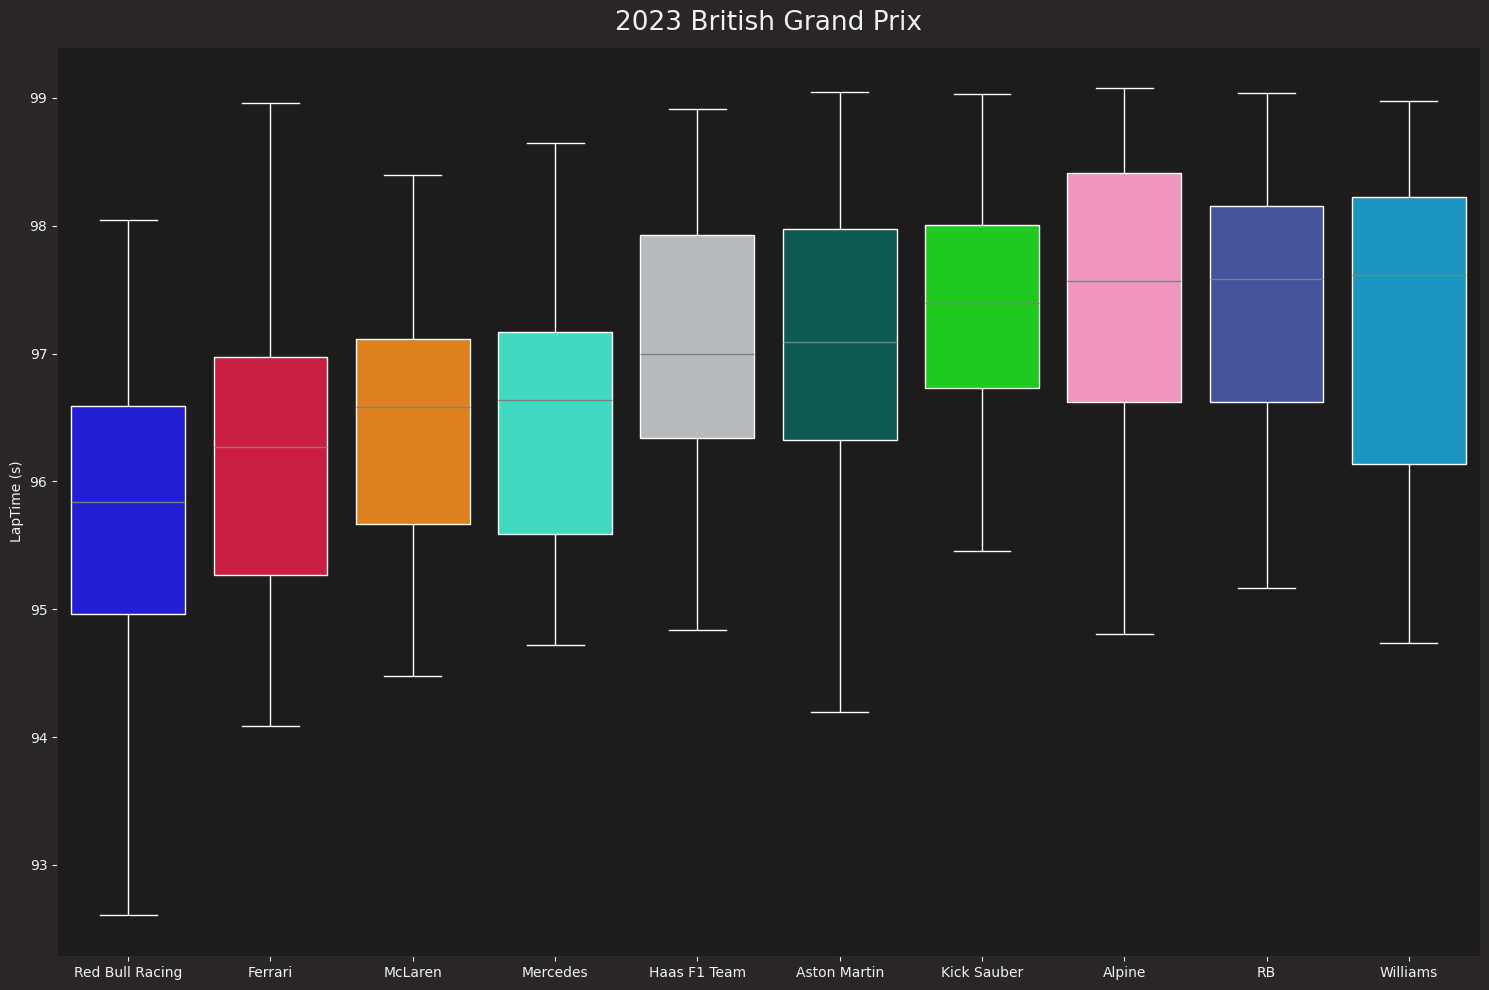

In [4]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    hue="Team",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title("2023 British Grand Prix")
plt.grid(visible=False)

# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()